# SVM Test Implementation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
genre_names = ['blues', 'classical', 'country', 'disco', 'hipop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [ ]:
# Dataset import
data = pd.read_csv('./extracted_dataset.csv')

# Dataset normalization
data_mean = data.mean()
data_std = data.std()

data_normalized = (data - data_mean) / data_std

In [ ]:
dataset = data_normalized.to_numpy()[:, 1:4]
labels = data_normalized.to_numpy()[:, 4]

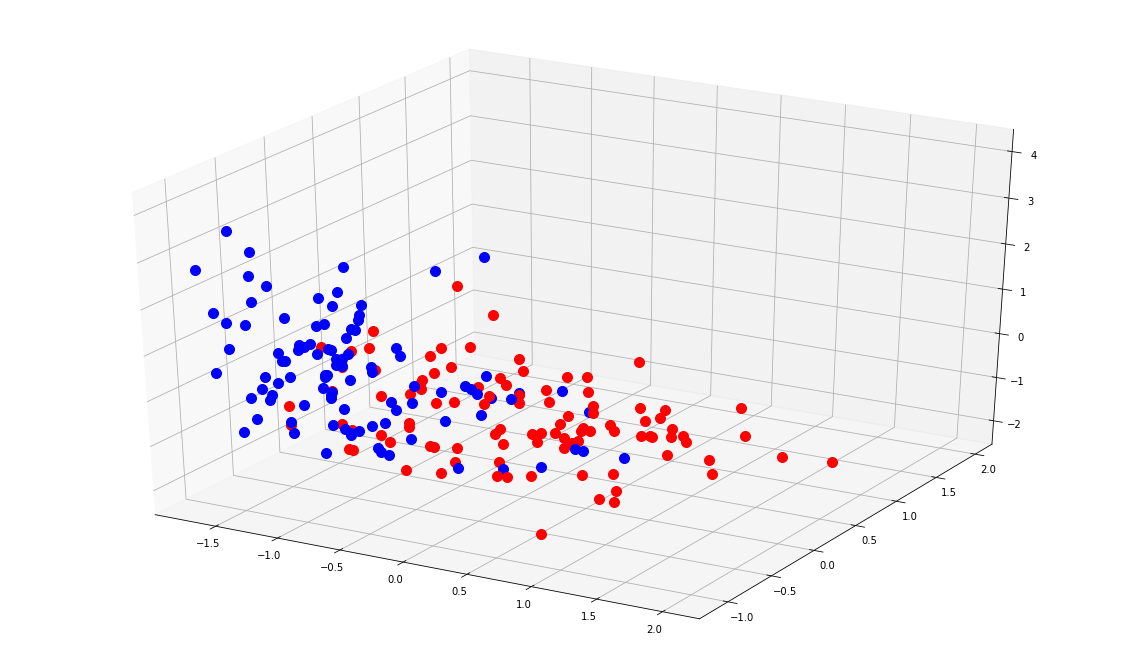

In [ ]:
class1_data = dataset[900:1000, :]
class2_data = dataset[100:200, :]

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(projection='3d')

for i in range(100):
  ax.scatter(class1_data[i, 0], class1_data[i, 1], class1_data[i, 2], label = 'rock', c='red', s = 100)
  ax.scatter(class2_data[i, 0], class2_data[i, 1], class2_data[i, 2], label = 'classical', c='blue', s = 100)

In [ ]:
reg = 0.001
learning_rate = 0.02

In [ ]:
w = np.random.randn(3)
b = 0

In [ ]:
def classify(x):
  return (np.dot(w, x) - b)

# Hingeloss

$l(x,y)=\max({0,\text{classify}(x) * y})$

In [ ]:
def hingeloss(x, y):
  prod = y * classify(x)

  if prod >= 1: return 0
  else: return 1-prod

In [ ]:
def hinge_derivative_w(x, y):
  prod = y * classify(x)
  prod_elem = y * x
  if prod >= 1: return np.zeros(x.shape[0])
  else: return -prod_elem

In [ ]:
def hinge_derivative_b(x, y):
  prod = y * classify(x)
  if prod >= 1: return 0
  else: return y

[ 0.72286685  1.15459794 -0.55873215]
-1.0261999999999913


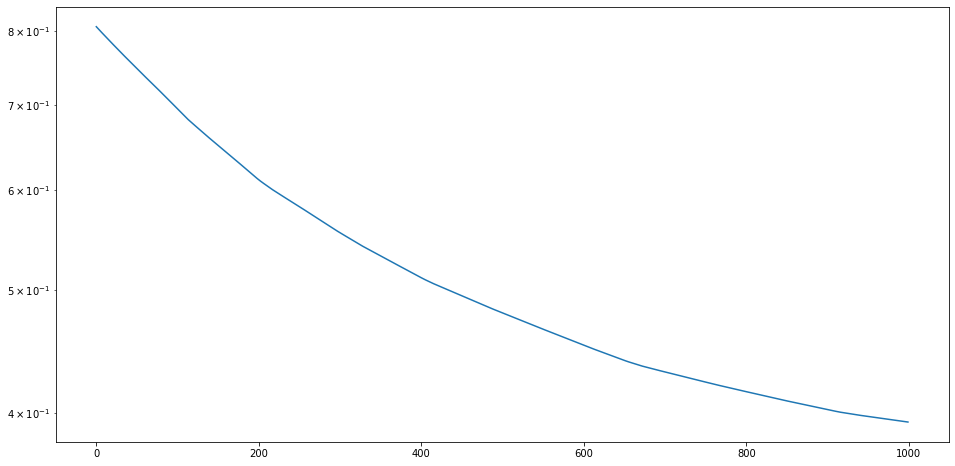

In [ ]:
history_loss = list()
loss = 0

for epoch in range(1000):
  gradient_w = np.zeros(w.size)
  gradient_b = 0

  for sample_index in range(100):
    gradient_w += hinge_derivative_w(class1_data[sample_index,:], 1)
    gradient_w += hinge_derivative_w(class2_data[sample_index,:], -1)
    gradient_b += hinge_derivative_b(class1_data[sample_index,:], 1)
    gradient_b += hinge_derivative_b(class2_data[sample_index,:], -1)

  gradient_w /= 200.0
  gradient_b /= 200.0

  w = w - learning_rate * gradient_w
  b = b - learning_rate * gradient_b

  loss=0
  for sample_index in range(100):
    loss += hingeloss(class1_data[sample_index,:], 1)
    loss += hingeloss(class2_data[sample_index,:], -1)

  history_loss.append(loss/200)

print(w)
print(b)

fig, axs = plt.subplots(figsize = (16,8))

axs.semilogy(history_loss)

In [ ]:
confusion_mat = np.zeros((2,2))

for test_index in range(100):
  predicted = 0 if classify(class1_data[test_index,:]) >= 0 else 1
  confusion_mat[0,predicted] += 1
  predicted = 0 if classify(class2_data[test_index,:]) >= 0 else 1
  confusion_mat[1,predicted] += 1
print(confusion_mat)
print(confusion_mat.trace() / confusion_mat.sum())

[[85. 15.]
 [14. 86.]]
0.855


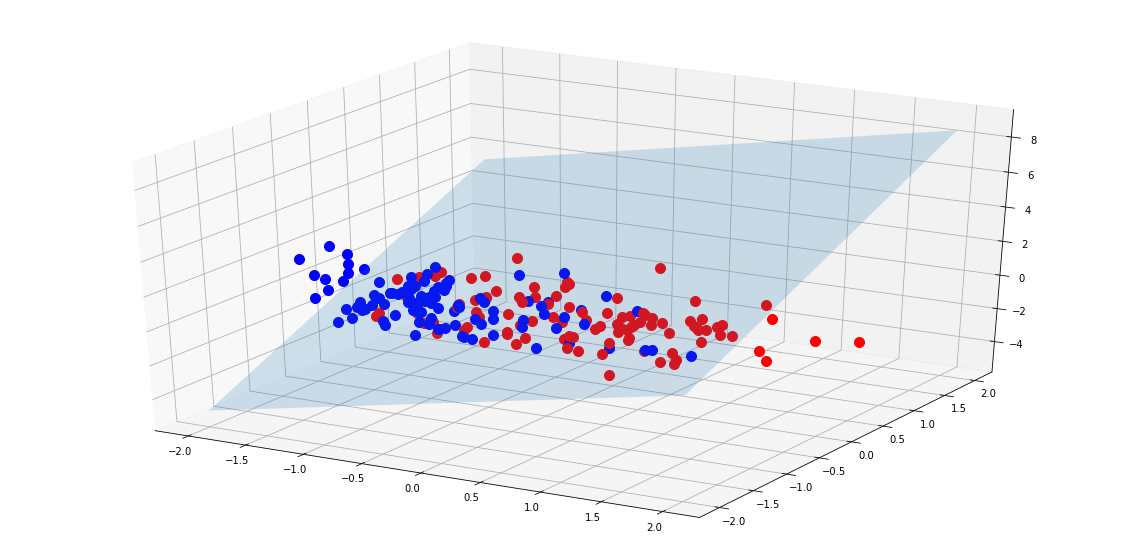

In [ ]:
# create x,y
xx, yy = np.meshgrid(range(-2,3), range(-2,3))

# calculate corresponding z
z = (-w[0] * xx - w[1] * yy + b) * 1. / w[2]

# plot the surface
plt3d = plt.figure(figsize=(20,10)).gca(projection='3d')
plt3d.plot_surface(xx, yy, z, alpha=0.2)


#and i would like to plot this point : 
for i in range(100):
  plt3d.scatter(class1_data[i, 0], class1_data[i, 1], class1_data[i, 2], label = 'rock', c='red', s = 100)
  plt3d.scatter(class2_data[i, 0], class2_data[i, 1], class2_data[i, 2], label = 'classical', c='blue', s = 100)

plt.show()

# Feature Mapping for higher dimensional projection of features

In [ ]:
def phi(x):
  f1 = x[0]
  f2 = x[1]
  f3 = x[2]
  return np.array([f1, f2, f3, f1**2, f2**2, f3**2, f1*f2, f2*f3, f1*f3])

[ 0.2209153   1.4365106  -0.1457953   0.10129091 -0.76562434  0.10582585
 -0.3874347   0.34318969 -0.03680288]
-1.5570999999999275


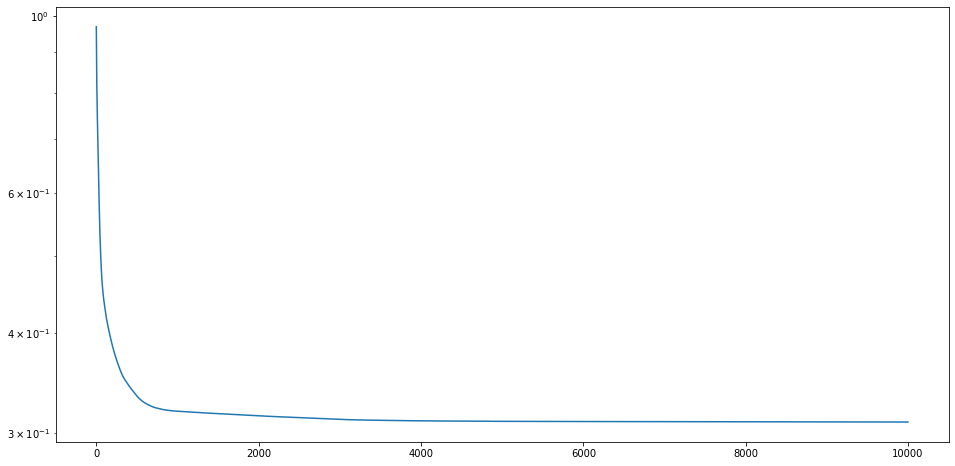

In [ ]:
feature_size = 9
w = np.zeros(feature_size)
b = 0

history_loss = list()
loss = 0

for epoch in range(10000):
  gradient_w = np.zeros(w.size)
  gradient_b = 0
  for sample_index in range(100):
    phi_1 = phi(class1_data[sample_index,:])
    phi_2 = phi(class2_data[sample_index,:])
    gradient_w += hinge_derivative_w(phi_1, 1)
    gradient_w += hinge_derivative_w(phi_2, -1)
    gradient_b += hinge_derivative_b(phi_1, 1)
    gradient_b += hinge_derivative_b(phi_2, -1)
  gradient_w /= 200.0
  gradient_b /= 200.0
  
  w = w - learning_rate * gradient_w
  b = b - learning_rate * gradient_b

  loss=0
  for sample_index in range(100):
    phi_1 = phi(class1_data[sample_index,:])
    phi_2 = phi(class2_data[sample_index,:])
    loss += hingeloss(phi_1, 1)
    loss += hingeloss(phi_2, -1)

  history_loss.append(loss/200)

print(w)
print(b)

fig, axs = plt.subplots(figsize = (16,8))

axs.semilogy(history_loss)

In [ ]:
from mpl_toolkits.mplot3d import axes3d

def plot_implicit(fn, bbox=(-2.5,2.5)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure(figsize=(20,12))
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 15) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y')

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x')

    for i in range(100):
      ax.scatter(class1_data[i, 0], class1_data[i, 1], class1_data[i, 2], label = 'rock', c='red', s = 100)
      ax.scatter(class2_data[i, 0], class2_data[i, 1], class2_data[i, 2], label = 'classical', c='blue', s = 100)

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)

    plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: No contour levels were found within the data range.


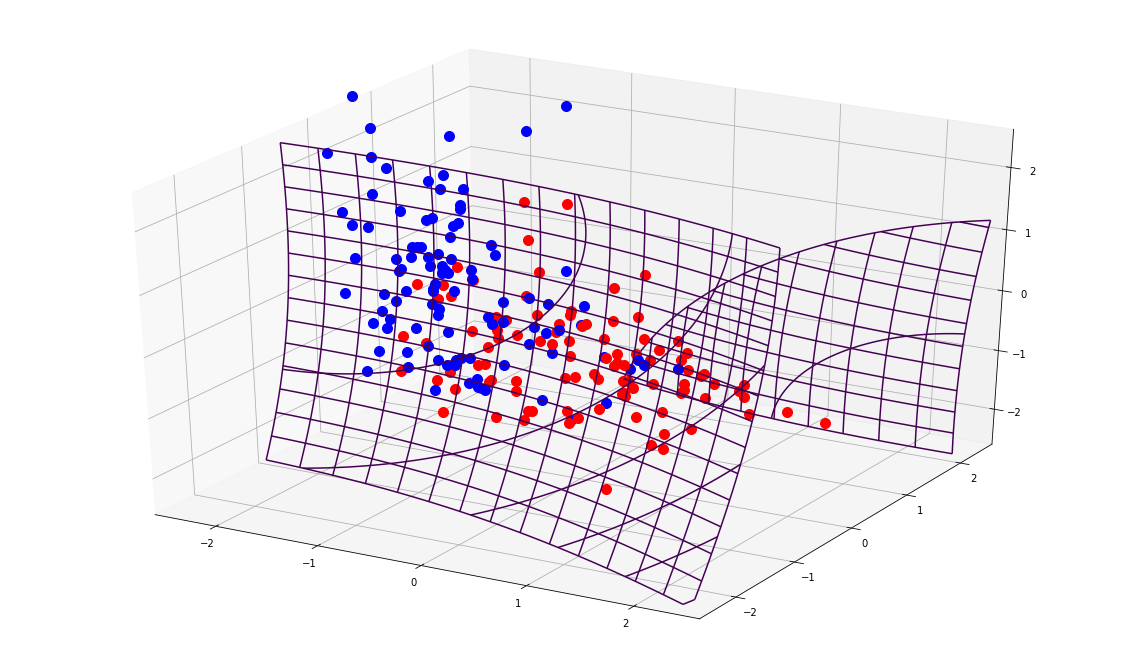

In [ ]:
def surface(x,y,z):
    return w[0]*x+w[1]*y+w[2]*z+w[3]*x**2+w[4]*y**2+w[5]*z**2+w[6]*np.multiply(x,y)+w[7]*np.multiply(y,z)+w[8]*np.multiply(x,z) - b

plot_implicit(surface)

In [ ]:
confusion_mat = np.zeros((2,2))

for test_index in range(100):
  predicted = 0 if classify(phi(class1_data[test_index,:])) >= 0 else 1
  confusion_mat[0,predicted] += 1
  predicted = 0 if classify(phi(class2_data[test_index,:])) >= 0 else 1
  confusion_mat[1,predicted] += 1
print(confusion_mat)
print(confusion_mat.trace() / confusion_mat.sum())

[[89. 11.]
 [12. 88.]]
0.885


# Solving SVM with the dual problem
The Lagrangian dual of the primal is
$\max L_D(a_i)=\sum_{i=1}^l{a_i}-\dfrac 1 2 \sum_{i=1}^l{a_ia_jy_iy_j\Big(x_i\cdot x_j\Big)}$
s.t. $\sum_{i=1}^l{a_iy_i}=0\ \ \ \land \ \ a_i\ge 0$

In [ ]:
import jax
import jax.numpy as jnp

In [ ]:
lag = lambda j, data, labels, params: jnp.sum(params) - jnp.sum(jnp.multiply(params,labels)) - 1/2 * jnp.sum(jnp.multiply(params, labels) * params[j] * labels[j] * jnp.dot(data, data[j]))

In [ ]:
lag_jit = jax.jit(lag)

lag_grad = jax.grad(lag, argnums=3)
lag_grad_jit = jax.jit(lag_grad)

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  func(*args, **kwargs)


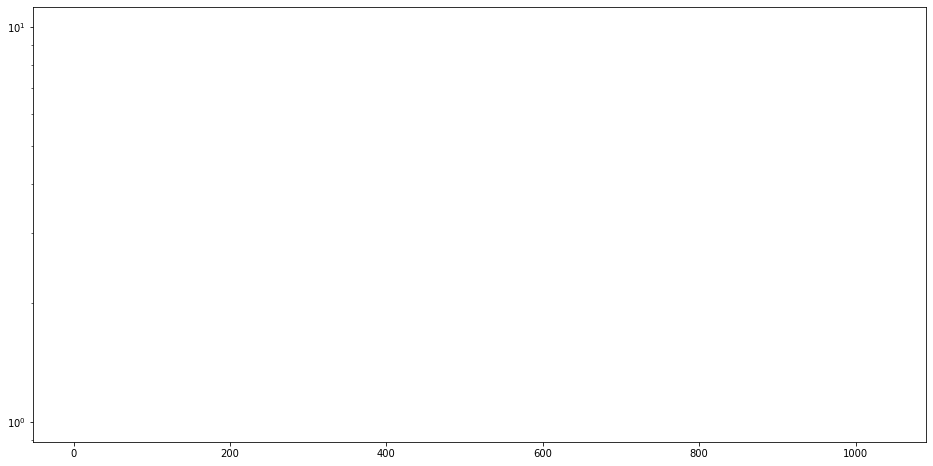

In [ ]:
lag_history = list()

a = np.random.randn(200)
in_data = np.concatenate((class1_data, class2_data), axis=0)
in_labels = np.concatenate((np.ones(100), -1 * np.ones(100)), axis=None)


# Record loss in history
loss = 0
for sample_index in range(in_data.shape[0]):
  loss += lag_jit(sample_index, in_data, in_labels, a)
loss /= in_data.shape[0]
lag_history.append(loss)

for epoch in range(10000):
  gradient = np.zeros(a.size)
  
  for sample_index in range(in_data.shape[0]):
    gradient += lag_grad_jit(sample_index, in_data, in_labels, a)
  gradient /= in_data.shape[0]
  
  a = a - learning_rate * gradient

  # Record loss in history
  loss = 0
  for sample_index in range(in_data.shape[0]):
    loss += lag_jit(sample_index, in_data, in_labels, a)
  loss /= in_data.shape[0]
  lag_history.append(loss)

fig, axs = plt.subplots(figsize = (16,8))

axs.semilogy(lag_history)

In [ ]:
print(lag_history)

[DeviceArray(-8.09333, dtype=float32), DeviceArray(-16.65385, dtype=float32), DeviceArray(-25.583424, dtype=float32), DeviceArray(-34.909325, dtype=float32), DeviceArray(-44.660988, dtype=float32), DeviceArray(-54.870205, dtype=float32), DeviceArray(-65.57112, dtype=float32), DeviceArray(-76.800705, dtype=float32), DeviceArray(-88.598724, dtype=float32), DeviceArray(-101.008125, dtype=float32), DeviceArray(-114.075195, dtype=float32), DeviceArray(-127.84988, dtype=float32), DeviceArray(-142.38603, dtype=float32), DeviceArray(-157.74167, dtype=float32), DeviceArray(-173.97948, dtype=float32), DeviceArray(-191.1672, dtype=float32), DeviceArray(-209.37752, dtype=float32), DeviceArray(-228.68936, dtype=float32), DeviceArray(-249.18738, dtype=float32), DeviceArray(-270.9633, dtype=float32), DeviceArray(-294.11584, dtype=float32), DeviceArray(-318.7516, dtype=float32), DeviceArray(-344.98575, dtype=float32), DeviceArray(-372.94226, dtype=float32), DeviceArray(-402.75528, dtype=float32), Devi